### Restaurant Recommendation System for Florida

In [1]:
import pandas as pd 
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk import sent_tokenize, word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

### Reading the business dataset

In [2]:
business_dataset = pd.read_json("yelp_academic_dataset_business.json", lines = True)
business_dataset

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [3]:
#checking for general informmation like null values and feature details.
business_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [4]:
#About 20 percent of the data contains the restraunts that are closed. Hence it will be pointless to recommend them.
business_dataset["is_open"].value_counts(1)

1    0.79615
0    0.20385
Name: is_open, dtype: float64

In [5]:
open_business_dataset = business_dataset.drop(business_dataset[business_dataset.is_open == 0].index)

In [6]:
#From now onwards we will be focussing only on the state of Florida.
Florida_dataset = open_business_dataset[open_business_dataset['state']== 'FL']

In [7]:
Florida_dataset.isnull().sum()

business_id        0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes      2386
categories        20
hours           2538
dtype: int64

In [8]:
Florida_dataset = Florida_dataset.dropna(axis = 0)

In [9]:
x = Florida_dataset['stars'].value_counts().index
y = Florida_dataset['stars'].value_counts().values

#### How are the ratings distributed accross all the restraunts.

Text(0.5, 0, 'Ratings ')

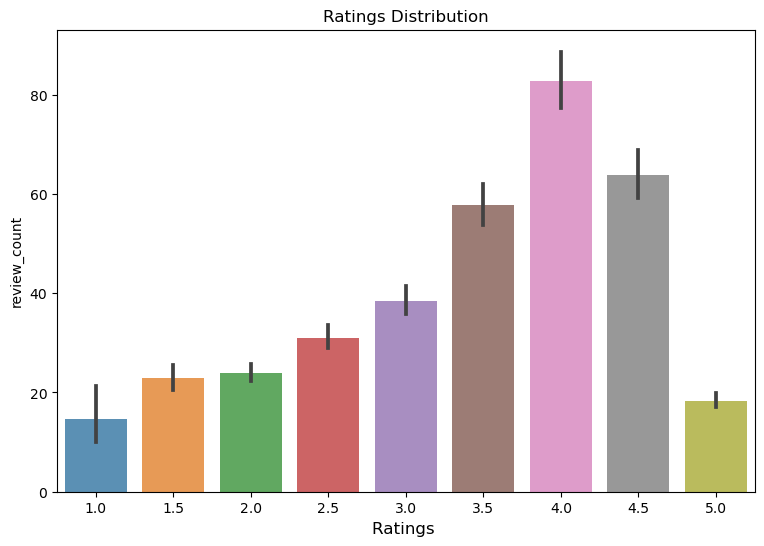

In [10]:
plt.figure(figsize=(9,6))
ax= sns.barplot(x = 'stars', y='review_count',data= Florida_dataset ,alpha=0.8 )
plt.title("Ratings Distribution")
plt.xlabel('Ratings ', fontsize=12)

In [11]:
business_cats=', '.join(Florida_dataset['categories'].dropna())
cats=pd.DataFrame(business_cats.split(', '),columns=['category'])
cats_ser = cats.category.value_counts()
cats_df = pd.DataFrame(cats_ser)
cats_df.reset_index(inplace=True)

In [12]:
Florida_dataset.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
10,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.457380,3.5,6,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:3..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755,27.966235,-82.787412,5.0,10,1,{'ByAppointmentOnly': 'True'},"General Dentistry, Dentists, Health & Medical,...","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:3..."


#### Top 20 Business Categories that yelp focusses on. 

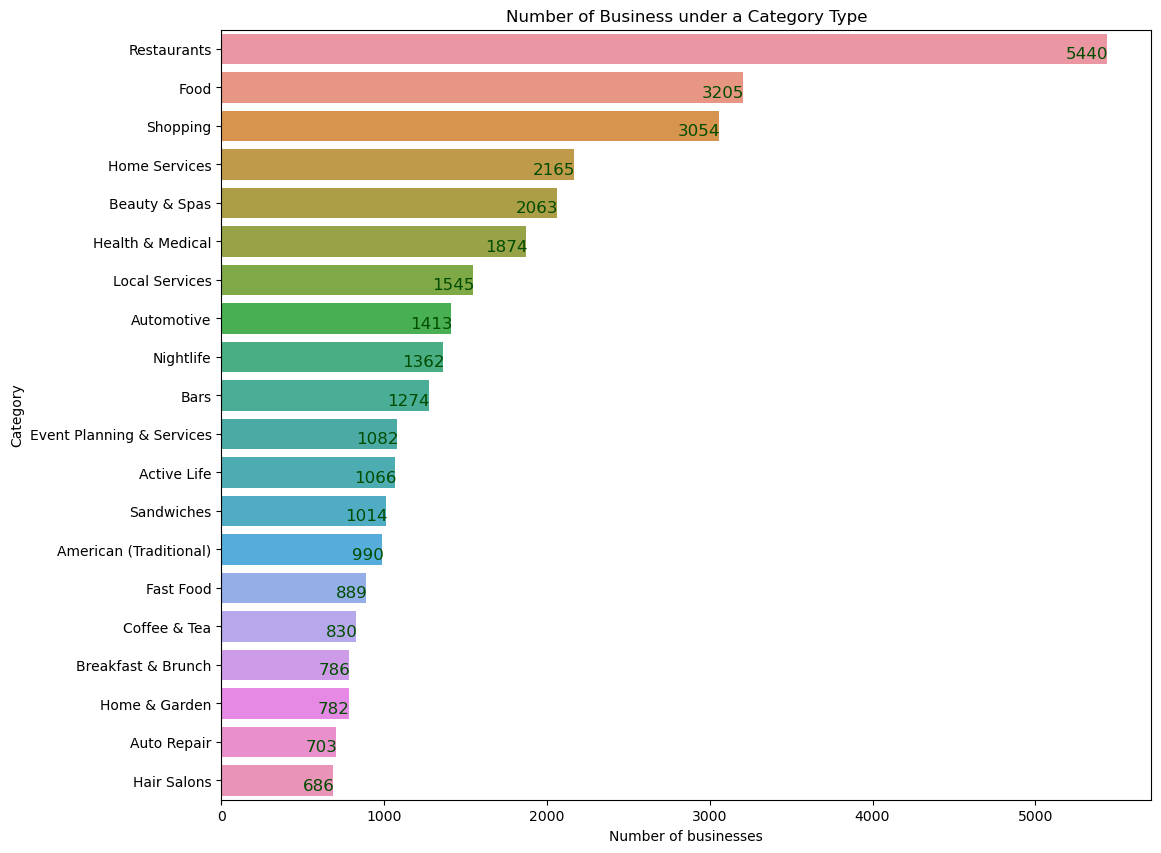

In [13]:
plt.figure(figsize=(12,10))
ax = sns.barplot( y= 'index',x = 'category' , data = cats_df.iloc[0:20])
ax.set_ylabel('Category')
ax.set_xlabel('Number of businesses')
ax.set_title('Number of Business under a Category Type')



for p in ax.patches:
    ax.annotate(int(p.get_width()),
                ((p.get_x() + p.get_width()),
                 p.get_y()),
                 xytext=(1, -18),
                fontsize=12,
                color='#004d00',
                textcoords='offset points',
                horizontalalignment='right')   
plt.show()    

### Reading the review Dataset.

In [14]:
size = 1000000
review = pd.read_json('yelp_academic_dataset_review.json', lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)

#### The real use of the reviews comes in play after we merge both datasets. Now we will be able to deal with proper numbers and see how reviews are there for all the restraunts in Florida.

In [15]:
chunk_list = []
for chunk_review in review:
    # Drop columns that aren't needed
    chunk_review = chunk_review.drop(['review_id','useful','funny','cool'], axis=1)
    # Renaming column name to avoid conflict with business overall star rating
    chunk_review = chunk_review.rename(columns={'stars': 'review_stars'})
    # Inner merge with edited business file so only reviews related to the business remain
    chunk_merged = pd.merge(Florida_dataset, chunk_review, on='business_id', how='inner')
    # Show feedback on progress
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)
# After trimming down the review file, concatenate all relevant data back to one dataframe
df = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

122145 out of 1,000,000 related reviews
130072 out of 1,000,000 related reviews
128975 out of 1,000,000 related reviews
129400 out of 1,000,000 related reviews
132838 out of 1,000,000 related reviews
136357 out of 1,000,000 related reviews
141848 out of 1,000,000 related reviews


In [16]:
#Checking if the data has been read correctly.
df.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,review_stars,text,date
0,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.45738,3.5,6,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:3...",u4Dzi_282Zw6hKqZJOhsSw,5,What's not to love about Marshalls?! I absolut...,2020-11-20 19:02:54
1,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.45738,3.5,6,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:3...",qjfMBIZpQT9DDtw_BWCopQ,4,"This is a nice Marshalls, and it is pretty new...",2015-07-24 00:31:29
2,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.45738,3.5,6,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:3...",F-OwSluUWMn0vMp3bPWMnQ,3,I Have not been here in so many years that I f...,2019-10-18 17:43:01


#### Saving to a CSV file.

In [17]:
csv_name = "yelp_business_reviews.csv"
df.to_csv(csv_name, index=False)

In [18]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk import sent_tokenize, word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#### Plotting Word clouds or 5 star reviews and 1 star reviews

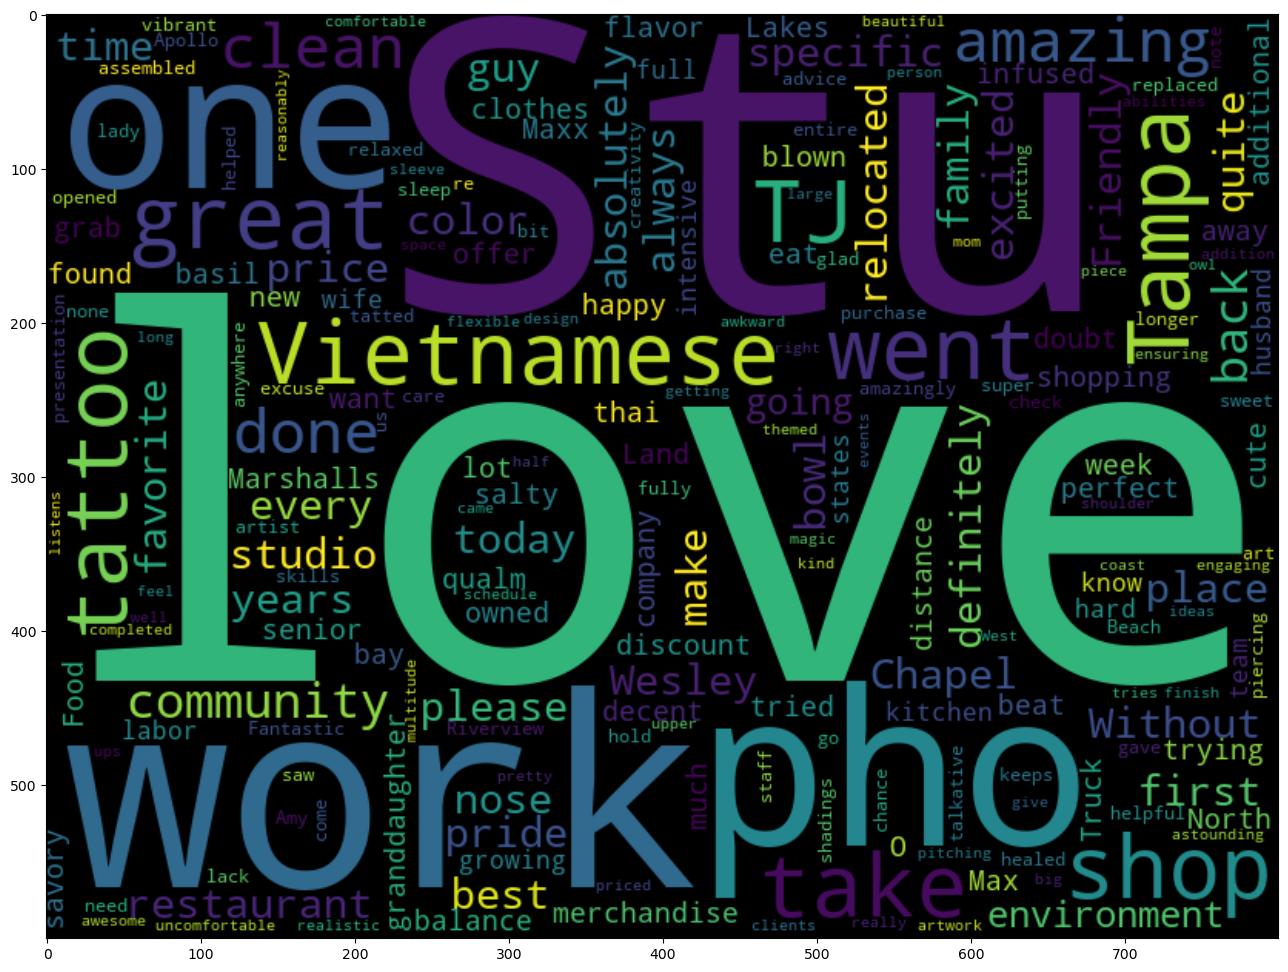

In [19]:
five_stars_reviewws = df[df.review_stars > 4]
stop_words = STOPWORDS.update(["area", "will", 'wasnt', 'n', 'nthe'])
text = "".join(str(five_stars_reviewws.text.values))
plt.figure(figsize = (16,12))
wc = WordCloud(max_words = 3000, width = 800, 
    height = 600, stopwords = STOPWORDS).generate(text)

plt.imshow(wc, interpolation = 'bilinear')

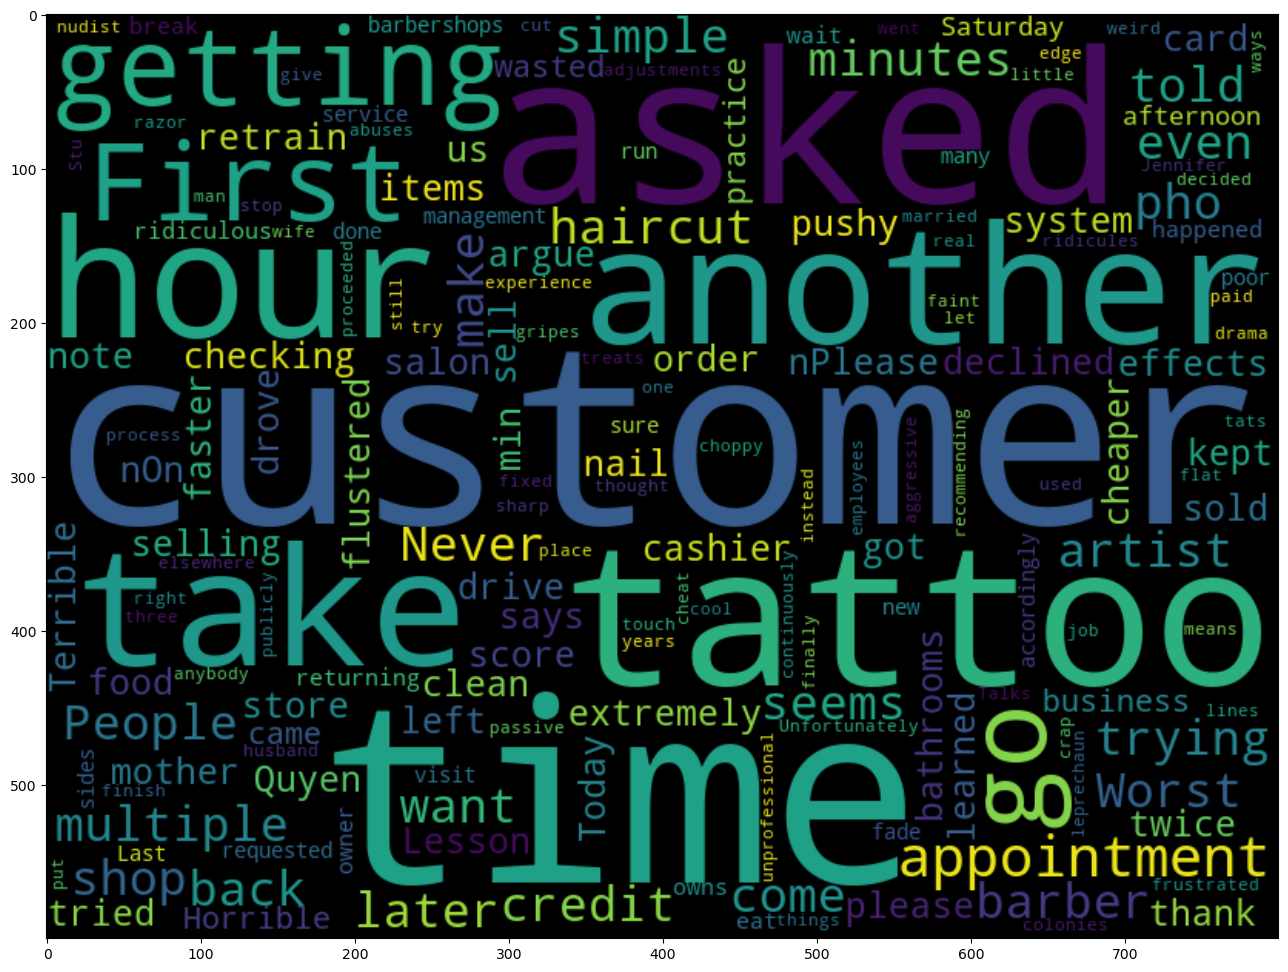

In [20]:
one_stars_reviewws = df[df.review_stars < 2]
text = "".join(str(one_stars_reviewws.text.values))
plt.figure(figsize = (16,12))
wc = WordCloud(max_words = 3000, width = 800, 
    height = 600, stopwords = STOPWORDS).generate(text)

plt.imshow(wc, interpolation = 'bilinear')

#### Top Restraunts in Florida.

In [21]:
top_restaurants_df = Florida_dataset.sort_values(by=["stars","review_count"], ascending=False)[:20]



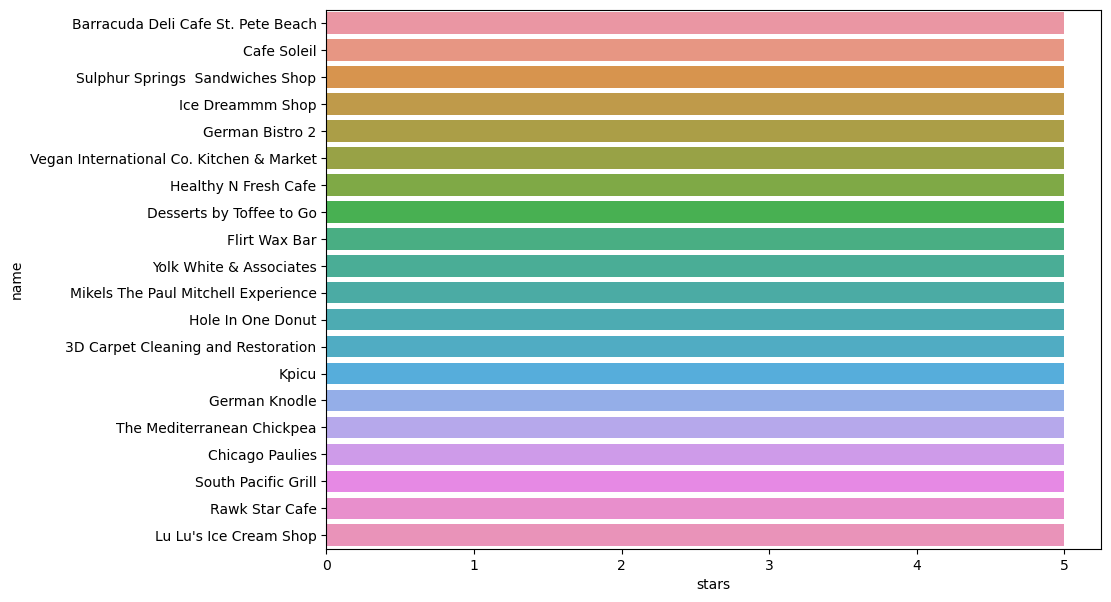

In [22]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x="stars", y="name", data=top_restaurants_df, ax=ax);
plt.show()

#### Further cleansing 
no nulls...and checking for ambiguity.


In [23]:
df.city.unique()

array(["Land O' Lakes", 'Tampa Bay', 'Clearwater', 'Pinellas Park',
       'Wesley Chapel', 'Tampa', 'Treasure Island', 'Tarpon Springs',
       'St. Petersburg', 'Land O Lakes', 'Largo', 'Madeira Beach', 'Lutz',
       'Brandon', 'TAMPA', 'Temple Terrace', 'Saint Petersburg', 'Odessa',
       'Spring Hill', 'Holiday', 'Oldsmar', 'Seminole', 'Gulfport',
       'Hernando Beach', 'Plant City', 'Spring HIll', 'Ruskin',
       'Safety Harbor', 'Valrico', 'St Petersburg', 'New Port Richey',
       'Trinity', 'Bellair', 'Dunedin', "Town 'n' Country", 'Riverview',
       'St Pete Beach', 'Sun City Center', 'Palm Harbor', 'Port Richey',
       'North Redington Beach', 'Greater Northdale', 'Mulberry',
       'Clearwater Beach', 'Dover', 'Seffner', 'Hudson', 'Zephyrhills',
       'Gibsonton', 'St. Pete Beach', 'Saint Pete Beach', "Land O'Lakes",
       'Wimauma', 'Pass-a-Grille', 'Indian Rocks Beach', 'East Lake',
       'NEW PORT RICHEY', 'Thonotosassa', 'Lithia', 'Ybor City',
       'Apollo Be

In [24]:
# changing everything to lowercase 
df['city'] = df['city'].str.lower()


In [25]:
#changing the word sain or saintt to st to remove ambiguity.
df['city'] = df['city'].str.replace(r'\bsaintt?\b', 'st')
df['city'] = df['city'].str.replace(r'\bst.\b', 'st')



C:\Users\Shree\AppData\Local\Temp/ipykernel_40868/3035803691.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r'\bsaintt?\b', 'st')
C:\Users\Shree\AppData\Local\Temp/ipykernel_40868/3035803691.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r'\bst.\b', 'st')


In [26]:
df.drop(df[df['city'] == 'st. petersburg'].index, inplace=True)

In [27]:
## dropping columns that are not required.
df.drop(columns=['state', 'is_open','business_id','user_id'],inplace = True)

#### Checking for all the different categories as we are only going to focus on the Food and Beverage Industry.

In [28]:
categories = df['categories']
def to_1D(series):
    return pd.Series([x.strip() for _list in series for x in _list])

In [29]:
business_categories = to_1D(categories.str.split(","))

In [30]:
business_categories

0          Department Stores
1                   Shopping
2                    Fashion
3          Department Stores
4                   Shopping
                 ...        
4756514               Tattoo
4756515        Beauty & Spas
4756516     Permanent Makeup
4756517             Piercing
4756518               Tattoo
Length: 4756519, dtype: object

<AxesSubplot:title={'center':'Top 10 Categories of Business'}>

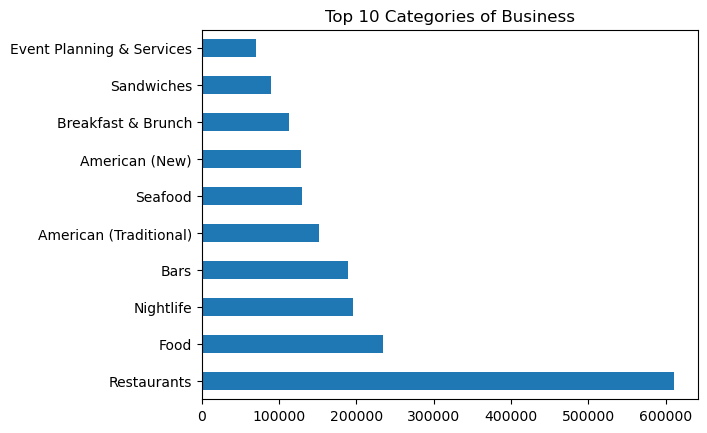

In [31]:
business_categories.value_counts()[:10].plot(kind='barh', title='Top 10 Categories of Business')

#### Most of the restaurants are located in Tampa city in Florida

<AxesSubplot:>

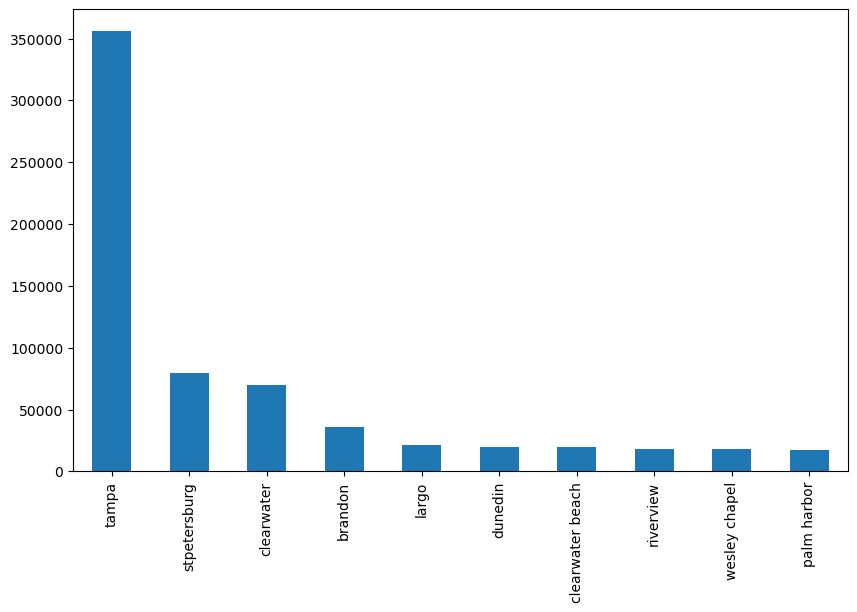

In [32]:

df.city.value_counts().head(10).plot(kind='bar', figsize=(10,6))

In [33]:
# The data looks highly skewed 

(-1.1046060000029745,
 1.100219340932525,
 -1.1038677265396908,
 1.1100294915631574)

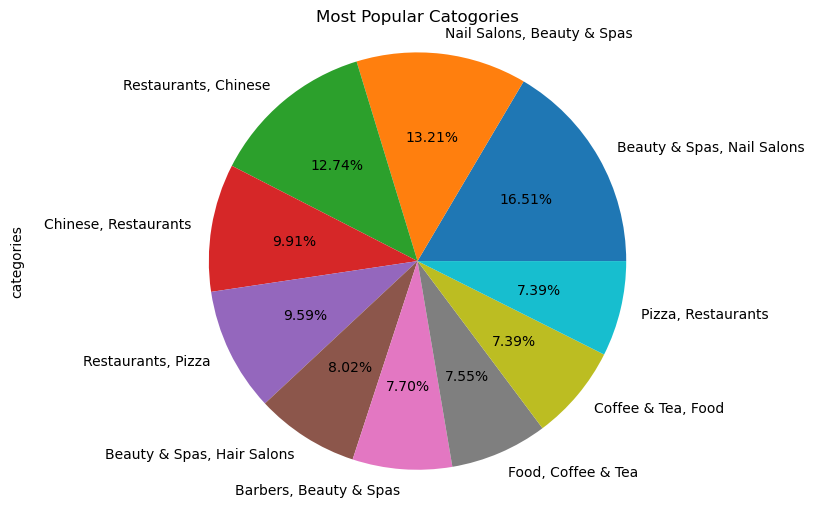

In [34]:
Florida_dataset['categories'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6), 
title="Most Popular Catogories", autopct='%1.2f%%')
plt.axis('equal')

In [35]:
df['categories'].value_counts()

Mexican, Restaurants                                                                                 6344
Restaurants, Mexican                                                                                 4428
Seafood, Restaurants                                                                                 3900
Pizza, Restaurants                                                                                   3872
Restaurants, Pizza                                                                                   3840
                                                                                                     ... 
Home Cleaning, Carpet Cleaning, Home Services, Local Services                                           5
Mexican, Food, Food Trucks, Tacos, Restaurants                                                          5
Restaurants, Juice Bars & Smoothies, Breakfast & Brunch, Sandwiches, Food, Cafes                        5
Rugs, Carpet Cleaning, Shopping, Home Services

In [36]:
Florida_dataset['categories'].value_counts().sort_values(ascending=False).head(10)

Beauty & Spas, Nail Salons    105
Nail Salons, Beauty & Spas     84
Restaurants, Chinese           81
Chinese, Restaurants           63
Restaurants, Pizza             61
Beauty & Spas, Hair Salons     51
Barbers, Beauty & Spas         49
Food, Coffee & Tea             48
Coffee & Tea, Food             47
Pizza, Restaurants             47
Name: categories, dtype: int64

In [37]:
business_cats=', '.join(df['categories'].dropna())
cats=pd.DataFrame(business_cats.split(', '),columns=['category'])
cats_ser = cats.category.value_counts()
cats_df = pd.DataFrame(cats_ser)
cats_df.reset_index(inplace=True)

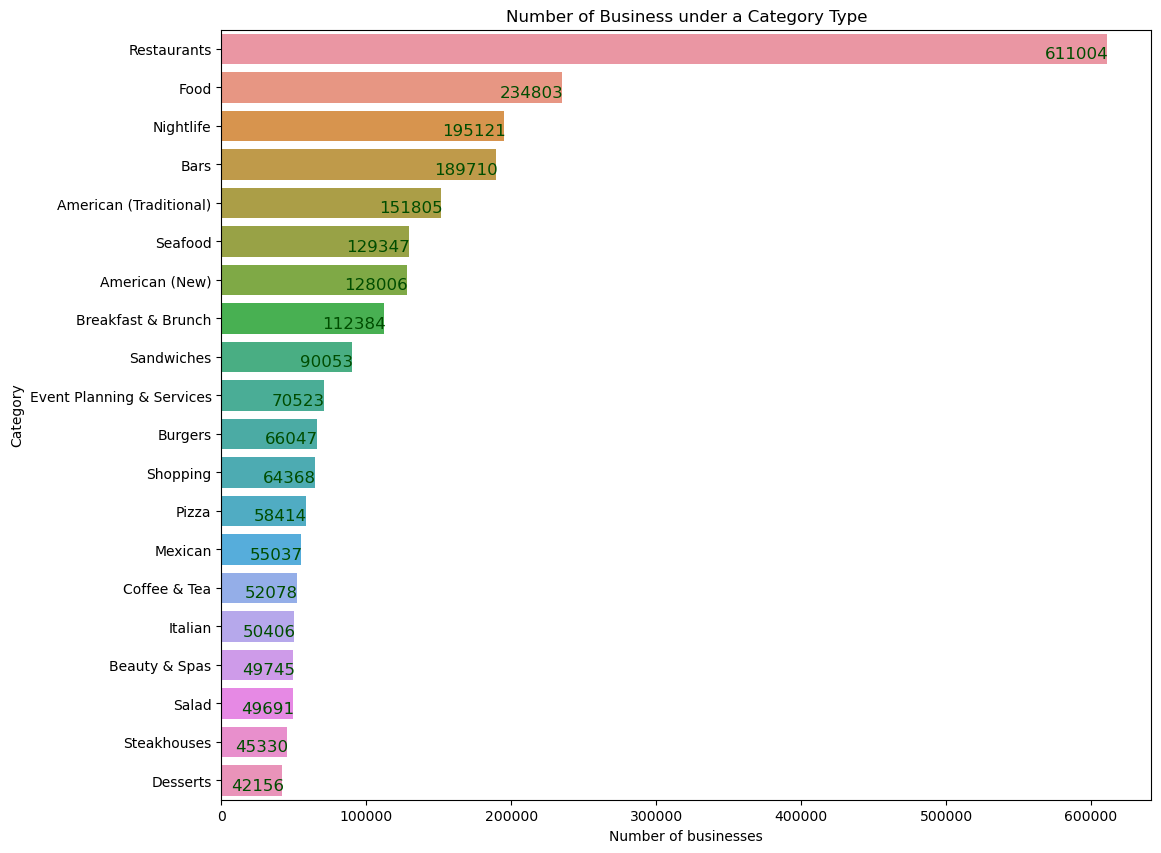

In [38]:
plt.figure(figsize=(12,10))
ax = sns.barplot( y= 'index',x = 'category' , data = cats_df.iloc[0:20])
ax.set_ylabel('Category')
ax.set_xlabel('Number of businesses')
ax.set_title('Number of Business under a Category Type')



for p in ax.patches:
    ax.annotate(int(p.get_width()),
                ((p.get_x() + p.get_width()),
                 p.get_y()),
                 xytext=(1, -18),
                fontsize=12,
                color='#004d00',
                textcoords='offset points',
                horizontalalignment='right')   
plt.show()    


In [39]:
F_B_business = df[df['categories'].str.contains('Restaurants|Fast Food|Breakfast & Brunch|Cafes',
                case=False, na=False)]
F_B_business.head()

,name,address,city,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,review_stars,text,date
6,Vietnamese Food Truck,,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",5,I eat pho about 4 times a week and from a spec...,2019-04-04 16:03:00
7,Vietnamese Food Truck,,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",5,I've been in Wesley Chapel area for about 2 ye...,2018-10-23 00:36:29
8,Vietnamese Food Truck,,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",3,Good tasted good - but I'm a bit confused as t...,2019-10-18 18:01:29
9,Vietnamese Food Truck,,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",4,"Ordered the chicken wings. They were hot, fre...",2019-03-29 19:09:43
10,Vietnamese Food Truck,,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",1,How can an order of pho take an 1 hour and 15 ...,2018-12-05 17:38:51


In [40]:
F_B_business.shape

(611119, 14)

In [41]:
# Splitting Date Column into Year, Month and Time Columns

def create_year(x): 
    return x.split('-')[0] 

def create_month(x): 
    return x.split('-')[1] 

def create_time(x):
    return x.split(' ')[1]

F_B_business['year'] = F_B_business.date.apply(create_year)
F_B_business['month'] = F_B_business.date.apply(create_month)
F_B_business['time'] = F_B_business.date.apply(create_time)

# Overview of new df with 3 new columns

F_B_business.head(2)

C:\Users\Shree\AppData\Local\Temp/ipykernel_40868/3919511280.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F_B_business['year'] = F_B_business.date.apply(create_year)
C:\Users\Shree\AppData\Local\Temp/ipykernel_40868/3919511280.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F_B_business['month'] = F_B_business.date.apply(create_month)
C:\Users\Shree\AppData\Local\Temp/ipykernel_40868/3919511280.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,name,address,city,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,review_stars,text,date,year,month,time
6,Vietnamese Food Truck,,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",5,I eat pho about 4 times a week and from a spec...,2019-04-04 16:03:00,2019,04,16:03:00
7,Vietnamese Food Truck,,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",5,I've been in Wesley Chapel area for about 2 ye...,2018-10-23 00:36:29,2018,10,00:36:29


In [42]:
year_sort = F_B_business.sort_values(by='year', ascending=True)

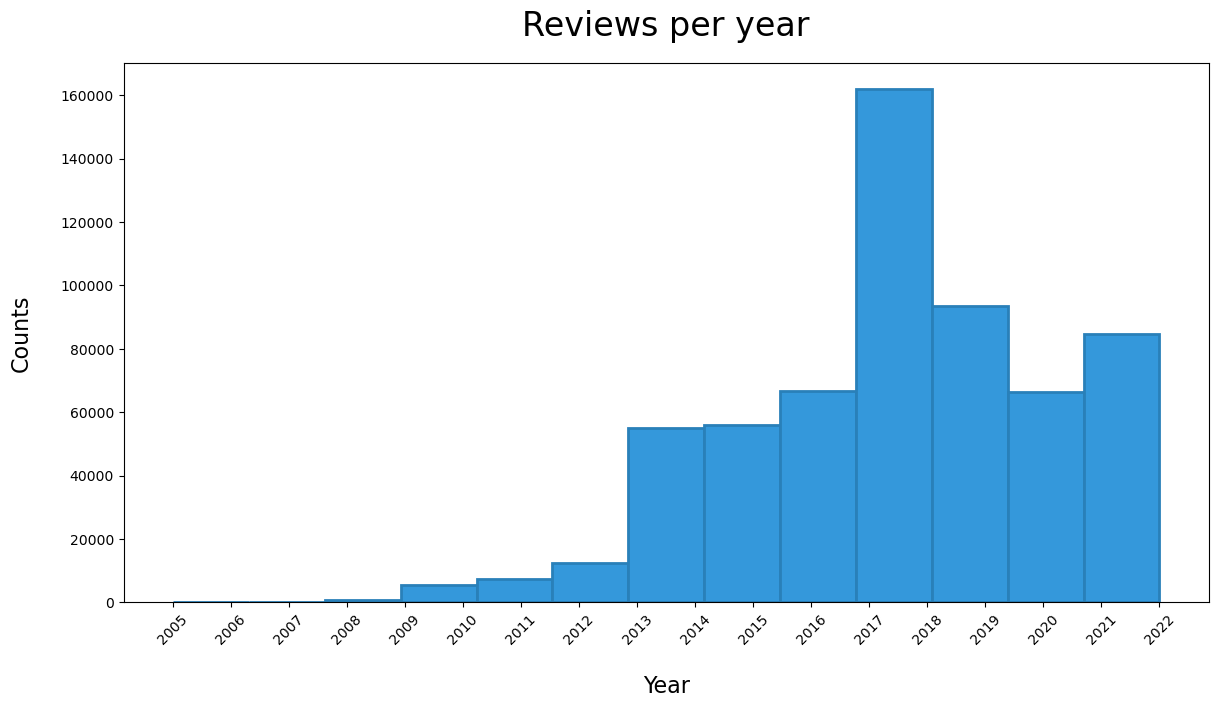

In [43]:
# Histogram plot of Restaurant Reviews per Year

def make_histogram(dataset, attribute, bins=13, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2) 
    plt.xticks(rotation=45)
    
make_histogram(year_sort, 'year', title='Reviews per year', xlab='Year', ylab='Counts')

In [44]:
F_B_business.city.unique()

array(['tampa bay', 'wesley chapel', 'tampa', 'treasure island', 'largo',
       'lutz', 'clearwater', 'stpetersburg', 'brandon', 'odessa',
       'oldsmar', 'spring hill', 'hernando beach', 'plant city', 'ruskin',
       'palm harbor', 'seminole', 'port richey', 'pinellas park',
       'sun city center', 'dunedin', 'gulfport', 'stpete beach',
       "land o' lakes", 'new port richey', 'clearwater beach',
       'tarpon springs', 'seffner', 'valrico', 'hudson', 'holiday',
       'riverview', 'dover', 'wimauma', 'trinity', 'temple terrace',
       'st. pete beach', 'safety harbor', 'thonotosassa', 'apollo beach',
       'madeira beach', 'south pasadena', 'land o lakes',
       'indian rocks beach', 'sun city', 'carrollwood', 'belleair bluffs',
       'twn n cntry', 'lithia', 'gibsonton', 'zephyrhills',
       'pinecrest west park', 'tierra verde', 'ozona', 'palmetto',
       'southwest tampa', "land o'lakes", 'kenneth city',
       'town n country', 'north redington beach', 'stpete',
  

### As we have seen so far most of the data has been in the city of tampa hence we will only focussing on tampa for this project.

In [45]:
# Filtering for Restaurant Business Data in the city of Tampa
df_tampa = F_B_business[F_B_business['city'].str.startswith('tampa')]

print(df_tampa.shape)
df_tampa.head(3)

(242181, 17)


,name,address,city,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,review_stars,text,date,year,month,time
6,Vietnamese Food Truck,,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",5,I eat pho about 4 times a week and from a spec...,2019-04-04 16:03:00,2019,04,16:03:00
7,Vietnamese Food Truck,,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",5,I've been in Wesley Chapel area for about 2 ye...,2018-10-23 00:36:29,2018,10,00:36:29
8,Vietnamese Food Truck,,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",3,Good tasted good - but I'm a bit confused as t...,2019-10-18 18:01:29,2019,10,18:01:29


In [47]:
df_tampa.to_csv("final_data.csv")

In [48]:
Florida_dataset

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
10,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.457380,3.5,6,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:3..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755,27.966235,-82.787412,5.0,10,1,{'ByAppointmentOnly': 'True'},"General Dentistry, Dentists, Health & Medical,...","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:3..."
74,9Rww8yE6Dm4dSMEq09nwXg,Holly Nails & Spa,9101 Belcher Rd,Pinellas Park,FL,33782,27.855347,-82.736308,4.5,16,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Health & Medical, Personal Care Services, Beau...","{'Tuesday': '9:30-19:0', 'Wednesday': '9:30-19..."
79,pJfh3Ct8iL58NZa8ta-a5w,Top Shelf Sports Lounge,3173 Cypress Ridge Blvd,Wesley Chapel,FL,33544,28.196252,-82.380615,4.5,95,1,"{'BestNights': '{'monday': False, 'tuesday': F...","Burgers, Sports Bars, Bars, Lounges, Restauran...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-23:..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150256,lsM3rDOLYQZBKdVAbKjn8Q,Old Time Pottery,10087 E Adamo Dr,Tampa,FL,33619,27.941949,-82.338981,3.5,29,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Home Decor, Arts & Crafts, Flowers & Gifts, Ho...","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ..."
150289,Fck8i0fNQCa22ERz5Fa21w,Thoughtful Moving,5004 E Fowler Ave,Tampa,FL,33617,28.054934,-82.400832,2.0,27,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Packing Services, Home Services, Movers, Local...","{'Monday': '22:0-22:30', 'Tuesday': '8:0-19:0'..."
150292,esBGrrmuZzSiECyRBoKvvA,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,27.770872,-82.643069,4.5,38,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R...","{'Monday': '11:30-23:0', 'Tuesday': '11:30-23:..."
150317,Q7JYAMNzI1IpUd2edflmTA,21 Barber,10937 56th St N,Temple Terrace,FL,33617,28.047632,-82.393519,4.5,18,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Men's Hair Salons, Hair Salons, Barbers, Beaut...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [51]:
Restraunts_Florida = Florida_dataset[Florida_dataset['categories'].str.contains('Restaurants|Fast Food|Breakfast & Brunch|Cafes',
                case=False, na=False)]

In [54]:
Restraunts_Florida_tampa = Restraunts_Florida[Restraunts_Florida['city'].str.startswith('Tampa')]

print(Restraunts_Florida_tampa.shape)
Restraunts_Florida_tampa.head(3)

(1820, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
93,RK6-cJ9hj53RzOlCBmpT-g,Impasto,,Tampa,FL,33611,27.890814,-82.502346,5.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Italian, Food Trucks, Food","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
188,QjV4v7q_pt7tt3K1US7IHg,PDQ Temple Terrace,5112 E Fowler Ave,Tampa,FL,33617,28.054888,-82.399548,3.0,5,1,"{'RestaurantsReservations': 'False', 'Business...","Fast Food, Sandwiches, Chicken Shop, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [55]:
Restraunts_Florida_tampa.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
93,RK6-cJ9hj53RzOlCBmpT-g,Impasto,,Tampa,FL,33611,27.890814,-82.502346,5.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Italian, Food Trucks, Food","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
188,QjV4v7q_pt7tt3K1US7IHg,PDQ Temple Terrace,5112 E Fowler Ave,Tampa,FL,33617,28.054888,-82.399548,3.0,5,1,"{'RestaurantsReservations': 'False', 'Business...","Fast Food, Sandwiches, Chicken Shop, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
224,Ucl9Vo5lwrUmYbV8Dv8X5g,O'Briens Irish Pub,15435 N Dale Mabry Hwy,Tampa,FL,33618,28.092360,-82.500588,4.0,108,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Bars, Pubs, Nightlife, Arts & Entertainment, I...","{'Monday': '18:0-2:30', 'Tuesday': '15:0-1:0',..."
254,VVvUBlc_WIEb8obKGq39dA,Four Green Fields,"4100 George J Bean Pkwy, Airside E, Tampa Inte...",Tampa,FL,33607,27.980399,-82.537787,4.5,39,1,"{'OutdoorSeating': 'False', 'Alcohol': ''full_...","Irish Pub, Bars, Restaurants, Irish, Nightlife","{'Monday': '5:0-21:30', 'Tuesday': '5:0-21:30'..."


In [56]:
Restraunts_Florida_tampa.to_csv("Business_tampa.csv")

In [2]:
# Importing User JSON File

line_count = len(open("yelp_academic_dataset_user.json").readlines())

# Creating Columns for Dataframe

users, names, review_counts, since, friends, useful, \
            funny, cool, n_fans, years_elite, average_stars = [], [], [], [], [], [], [], [], [], [], []

# Iterating through each row of the json file

with open("Data/Kaggle/yelp_academic_dataset_user.json") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        users += [blob["user_id"]]
        names += [blob["name"]]
        review_counts += [blob["review_count"]]
        since += [blob["yelping_since"]]
        friends += [blob["friends"]]
        useful += [blob["useful"]]
        funny += [blob["funny"]]
        cool += [blob["cool"]]
        n_fans += [blob["fans"]]
        average_stars += [blob["average_stars"]]

# Creating Dataframe for User json file

users_df = pd.DataFrame(
    {"user_id": users, 
     "user_name": names,
     "user_review_count": review_counts,
     "user_yelp_since": since,
     "friends": friends,
     "useful_reviews": useful,
     "funny_reviews": funny,
     "cool_reviews": cool,
     "n_fans": n_fans,
     "average_stars": average_stars
    }
)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x90 in position 3919: character maps to <undefined>